## Calculating Descriptive Statistics

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

In [3]:
print(x,x_with_nan)

[8.0, 1, 2.5, 4, 28.0] [8.0, 1, 2.5, nan, 4, 28.0]


In [4]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures of Central Tendencies

### Mean

In [5]:
mean_ = sum(x) / len(x)
mean_

8.7

In [6]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [8]:
mean_ = statistics.mean(x_with_nan)
mean_

nan

In [9]:
mean_ = y.mean()
mean_

8.7

In [10]:
np.nanmean(y_with_nan) #ignore nan

8.7

## Median

In [11]:
x

[8.0, 1, 2.5, 4, 28.0]

In [12]:
statistics.median_low(x[:-1])

2.5

In [13]:
statistics.median_high(x[:-1])

4

In [16]:
print(x_with_nan)
print(statistics.median(x_with_nan))#nan is accounted and it is the highest value
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

[8.0, 1, 2.5, nan, 4, 28.0]
6.0
4
8.0


In [17]:
median_ = np.median(y[:-1])
print(median_)

3.25


In [18]:
z.median()

4.0

In [19]:
z_with_nan.median()

4.0

## Mode

In [20]:
#pure Python
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [21]:
statistics.mode(u)

2

In [23]:
u,v=np.array(u),np.array(v)

u,v

(array([ 2,  3,  2,  8, 12]), array([12, 15, 12, 15, 21, 15, 12]))

In [24]:
mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [25]:
mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [26]:
print(mode_.mode)
print(mode_.count)

[2]
[2]


In [27]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Variance

In [28]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [29]:
var_ = statistics.variance(x)
var_

123.2

In [30]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [31]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [32]:
z.var(ddof=1)

123.19999999999999

## Standard Deviation

In [33]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [34]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [35]:
np.std(y, ddof=1)

11.099549540409285

In [36]:
y.std(ddof=1)

11.099549540409285

In [37]:
z.std(ddof=1)

11.099549540409285

## Skewness

In [38]:
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

In [39]:
skew_

1.9470432273905929

In [40]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [41]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [42]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [43]:
z_with_nan.skew()

1.9470432273905924

## Percentile

In [44]:
y = np.array(x)
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [45]:
np.percentile(y, 5)

1.3

In [46]:
np.percentile(y, 95)

23.999999999999996

In [47]:
np.percentile(y, 50)

4.0

In [48]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
y = np.array(x)

In [49]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [50]:
np.median(y)

8.0

In [51]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [52]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [53]:
# Working with 2D data

a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])

In [54]:
np.mean(a)

5.4

In [55]:
np.median(a)

2.0

In [56]:
a.var(ddof=1)

53.40000000000001

In [57]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [58]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

## Data Frame

In [59]:
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [60]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']

df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [61]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [62]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [63]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


## Visualization

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [64]:
# Box Plot

np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

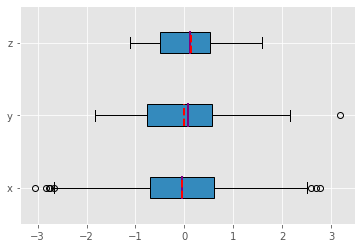

In [67]:
fig, ax = plt.subplots()

ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})

plt.show()